In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.model_selection import train_test_split

In [2]:
data_csv="/home/james/data/Malware/train.csv"

df = pd.read_csv(data_csv)

/usr/local/Anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (28) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Get Labels
labels = df['HasDetections']

/usr/local/Anaconda/lib/python3.6/site-packages/seaborn/categorical.py:1460: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


Number of Postive:  4462591
Number of Negative :  4458892


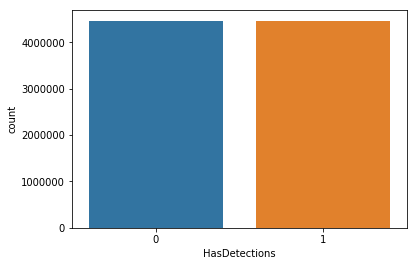

In [4]:
ax = sns.countplot(labels,label="Count")    
has,hasnot = labels.value_counts()
print('Number of Postive: ',has)
print('Number of Negative : ',hasnot)

It can be seen that the label categories are almost equal.

In [5]:
print(list(df.columns.values))

['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'PuaMode', 'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_ProcessorClass', 'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_ChassisType

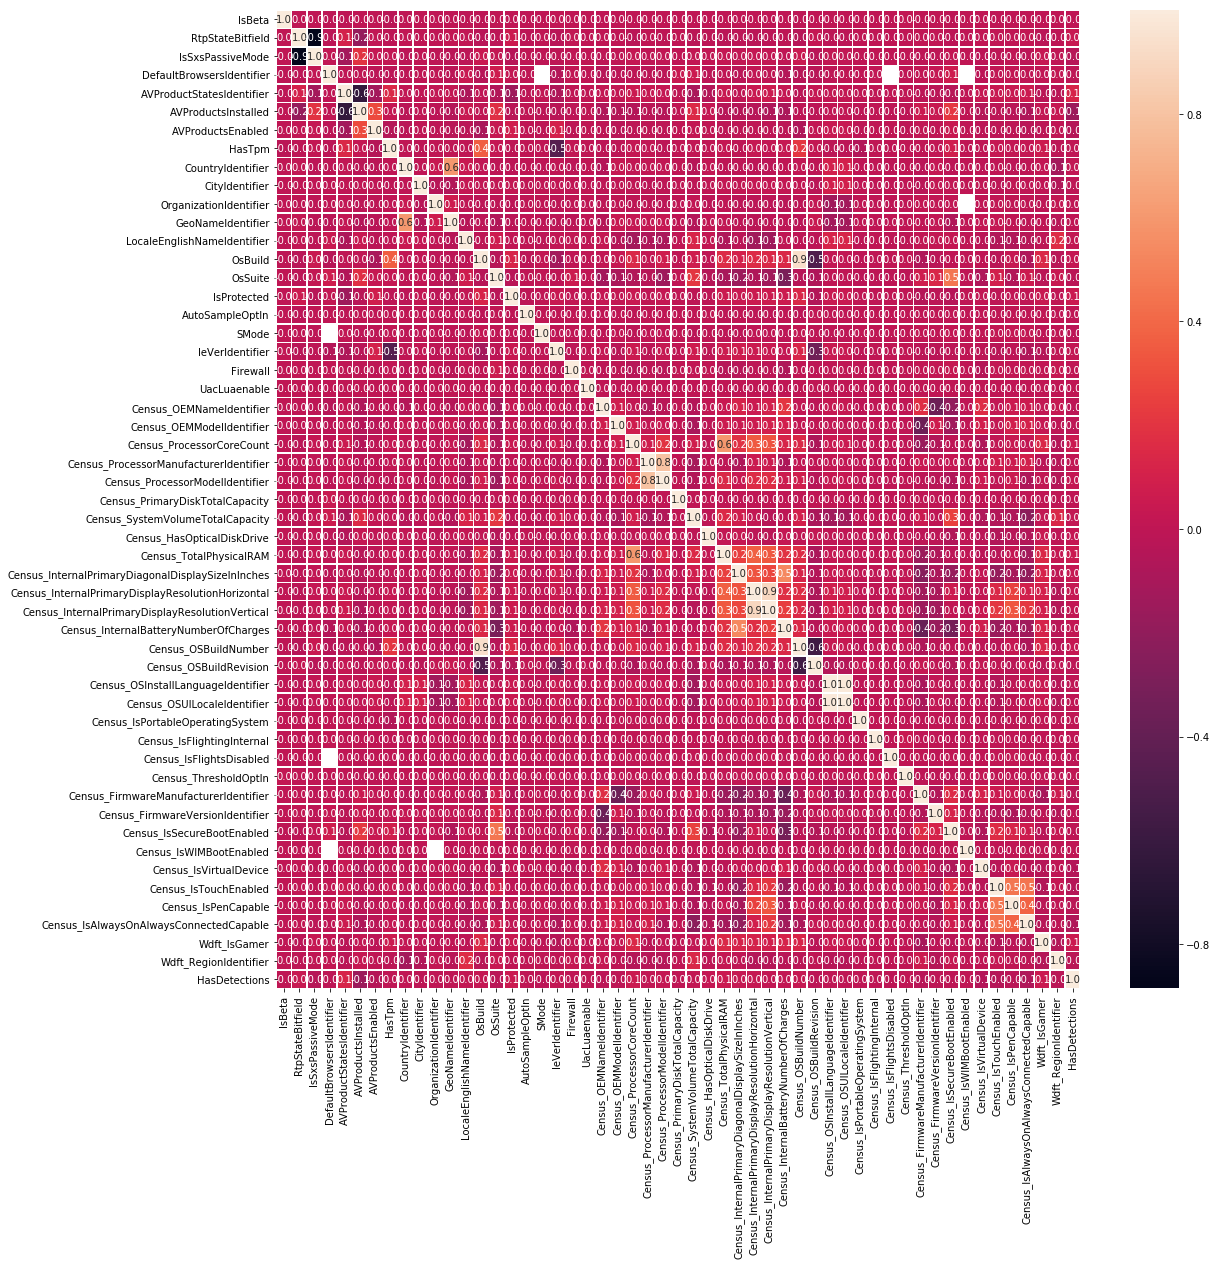

In [6]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(df.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

In [7]:
# Remove the labels from the dataframe
df = df.drop(['HasDetections'], axis=1)
print(df.shape)

(8921483, 82)


In [8]:
x_train, x_test, y_train, y_test = train_test_split(df, labels, test_size=0.3, random_state=42)

In [9]:
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/Anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 3267, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-cfc2a3907a85>", line 2, in <module>
    select_feature = SelectKBest(chi2, k=5).fit(x_train, y_train)
  File "/usr/local/Anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py", line 341, in fit
    X, y = check_X_y(X, y, ['csr', 'csc'], multi_output=True)
  File "/usr/local/Anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py", line 573, in check_X_y
    ensure_min_features, warn_on_dtype, estimator)
  File "/usr/local/Anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py", line 448, in check_array
    array = array.astype(np.float64)
ValueError: could not convert string to float: '98a5377be2478d4b0e6274ad146619d3'

During handling of the above exception, another exception occurred:

Traceback (most recent 

ValueError: could not convert string to float: '98a5377be2478d4b0e6274ad146619d3'